In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
filename = 'C:\\Users\\Troy\\Downloads\\BigQuery Results_Big Query Results.csv'
pd.options.display.max_rows = 9999
df = pd.read_csv(filename)

print(f"iperf_interval_throughput_list: {type(df)}")
#print(f"iperf_interval_throughput_list: {df[["iperf_interval_throughput_list"]]}")
#print(f"iperf_interval_throughput_list: {df.loc("iperf_interval_throughput_list")}")
#print(df[39:40])

#print(df.info())
df.sort_values(by=['date_time', 'run_uri'], inplace=True, ascending=True)
df = df.set_index('thedate')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 20)
df.head()

iperf_interval_throughput_list: <class 'pandas.core.frame.DataFrame'>


,sample_uri,run_uri,value,unit,date_time,vm_1_cloud,vm_2_cloud,vm_1_zone,vm_2_zone,sending_zone,receiving_zone,sending_region,receiving_region,sending_machine_type,receiving_machine_type,sending_thread_count,ip_type,network_tier,vm_2_gce_network_tier,buffer_size,congestion_window,err_packet_count,interval_length_seconds,netpwr,receiving_machine_mtu,sending_machine_mtu,retry_packet_count,rtt_us,runtime_in_seconds,tcp_window_size,transfer,vm_1_tcp_congestion_control,vm_2_tcp_congestion_control,write_packet_count,iperf_interval_cwnd_list,iperf_interval_netpwr_list,iperf_interval_length_seconds,iperf_interval_rtt_list,iperf_interval_start_time_list,iperf_interval_throughput_list,iperf_transfer_mbytes,vm_1_machine_type,vm_2_machine_type,vm_1_kernel_release,vm_2_kernel_release,rmem_max,tcp_max_receive_buffer,tcp_max_send_buffer,vm_1_wmem_max
thedate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-11-06 04:05:01.04905 UTC,310ca9e8-9cea-4ebb-907d-65cb95da7804,41407644-b450f5a5-26f4-4a16-87bb-cb71a7fbe5d3,6347.0,Mbits/sec,2021-11-06 04:05:01 UTC,GCP,GCP,us-east1-b,us-west1-b,us-east1-b,us-west1-b,us-east1,us-west1,n1-standard-16,n1-standard-16,1,external,standard,standard,0.12,-1.0000,0,0.5,12313.700000,1500,1500,0,64427.0000,15,0.12,NaN,bbr,bbr,90834,"['14', '1457', '108803', '112709', '106357', '...","['310.13', '20017.74', '12128.08', '13701.47',...",0.5,"['65086', '63435', '63547', '63654', '64202', ...","[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, ...","['161', '10159', '6166', '6977', '6560', '6568...",11354.0,n1-standard-16,n1-standard-16,5.4.0-1056-gcp,5.4.0-1056-gcp,212992,500000000,500000000,212992
2021-11-06 04:05:21.7302 UTC,66a19144-c727-47a0-ab96-cd90f8190cb5,41407644-b450f5a5-26f4-4a16-87bb-cb71a7fbe5d3,7812.0,Mbits/sec,2021-11-06 04:05:21 UTC,GCP,GCP,us-east1-b,us-west1-b,us-east1-b,us-west1-b,us-east1,us-west1,n1-standard-16,n1-standard-16,1,internal,standard,standard,0.12,-1.0000,1,0.5,15156.420000,1500,1500,199615,64431.0000,15,0.12,NaN,bbr,bbr,112848,"['14', '1510', '140147', '140704', '138153', '...","['311.73', '21118.55', '14847.32', '14757.86',...",0.5,"['64752', '63331', '64974', '64835', '65190', ...","[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, ...","['161', '10700', '7718', '7655', '8496', '8173...",14106.0,n1-standard-16,n1-standard-16,5.4.0-1056-gcp,5.4.0-1056-gcp,212992,500000000,500000000,212992
2021-11-06 04:05:42.834408 UTC,71787bef-7468-4cb6-a83a-ad7534b2b8fc,41407644-b450f5a5-26f4-4a16-87bb-cb71a7fbe5d3,6555.0,Mbits/sec,2021-11-06 04:05:42 UTC,GCP,GCP,us-east1-b,us-west1-b,us-west1-b,us-east1-b,us-west1,us-east1,n1-standard-16,n1-standard-16,1,external,standard,standard,0.12,-1.0000,0,0.5,12856.490000,1500,1500,514818,63736.0000,15,0.12,NaN,bbr,bbr,94257,"['14', '1443', '142164', '139822', '143255', '...","['310.58', '18783.36', '16031.70', '10105.18',...",0.5,"['64992', '63498', '63853', '64468', '63620', ...","[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, ...","['161', '9542', '8189', '5212', '7984', '5732'...",11781.0,n1-standard-16,n1-standard-16,5.4.0-1056-gcp,5.4.0-1056-gcp,212992,500000000,500000000,212992
2021-11-06 04:06:03.387415 UTC,27897667-77ff-4495-83a8-0e9d6b0b8335,41407644-b450f5a5-26f4-4a16-87bb-cb71a7fbe5d3,8167.0,Mbits/sec,2021-11-06 04:06:03 UTC,GCP,GCP,us-east1-b,us-west1-b,us-west1-b,us-east1-b,us-west1,us-east1,n1-standard-16,n1-standard-16,1,internal,standard,standard,0.12,-1.0000,0,0.5,15885.050000,1500,1500,222227,64268.0000,15,0.12,NaN,bbr,bbr,116835,"['14', '1494', '134706', '139610', '138057', '...","['312.49', '17747.49', '17084.89', '17324.97',...",0.5,"['64595', '63261', '68632', '64337', '63862', ...","[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, ...","['161', '8982', '9381', '8917', '8638', '8321'...",14604.0,n1-standard-16,n1-standard-16,5.4.0-1056-gcp,5.4.0-1056-gcp,212992,500000000,500000000,212992
2021-11-06 04:06:24.202496 UTC,074e2dde-28e6-4966-97cc-6b982e4f26ba,41407644-b450f5a5-26f4-4a16-87bb-cb71a7fbe5d3,7969.0,Mbits/sec,2021-11-06 04:06:24 UTC,GC

In [4]:
gb = df.groupby(['sending_zone',
                 'receiving_zone',
                 'tcp_max_receive_buffer',
                 'vm_1_machine_type',
                 'ip_type',
                 'iperf_interval_rtt_list',
                 'iperf_interval_throughput_list'], 
                as_index=False)[[
                                  'sending_zone',
                 'receiving_zone',
                 'tcp_max_receive_buffer',
                 'vm_1_machine_type',
                 'ip_type',
                 'iperf_interval_rtt_list',
                 'iperf_interval_throughput_list',
                                ]]
list(gb.groups)[0:5]

[('asia-east1-b',
  'us-central1-a',
  500000000,
  'n1-standard-16',
  'external',
  "['154837', '153416', '153247', '153309', '153433', '157687', '154525', '153620', '154544', '153734', '153472', '154798', '153788', '153549', '154074', '154518', '154220', '153823', '154513', '154309', '153463', '153459', '154155', '153895', '153786', '153509', '153606', '154588', '153457', '154294']",
  "['12.1', '65.0', '614', '4796', '6553', '4639', '5419', '9557', '6093', '5362', '7615', '6381', '6096', '8139', '6623', '4758', '7483', '6830', '6787', '8120', '7049', '5380', '6893', '5639', '7681', '5478', '4042', '6778', '7151', '5845']"),
 ('asia-east1-b',
  'us-central1-a',
  500000000,
  'n1-standard-16',
  'external',
  "['154844', '153592', '153398', '153580', '153488', '157362', '159768', '157229', '157817', '156533', '156731', '157776', '161429', '157906', '157754', '156522', '161734', '156648', '157460', '156846', '157537', '157074', '157356', '157203', '156796', '156446', '156818', '15708

In [5]:
group_list = list(gb.groups)
g = group_list[0]
print(f"Group List is: {len(gb.groups)}")

Group List is: 47480


In [6]:
max_len = 0
for i in list(gb.groups):
  l = len(gb.get_group(i).values.tolist())
  if l > max_len:
    max_len = l
    
max_len

48

In [7]:
g = group_list[4]
g

('asia-east1-b',
 'us-central1-a',
 500000000,
 'n1-standard-16',
 'external',
 "['155087', '153587', '153478', '153574', '153715', '156084', '154031', '154773', '154575', '153990', '154007', '154827', '155408', '155610', '155519', '154671', '154018', '155214', '154777', '155140', '154924', '154299', '154081', '154774', '154546', '154762', '154372', '154149', '154089', '154107', '154469', '153962', '154255', '154699', '153689', '153995', '155197', '154193', '154914', '154391', '153880', '155332', '153313', '154368', '153975', '154209', '153752', '154335', '154527', '154314', '155468', '154928', '155130', '155195', '155231', '155260', '155004', '154774', '155332', '154533']",
 "['12.1', '65.0', '614', '4266', '7827', '4210', '6507', '7665', '5587', '7713', '7019', '6421', '6757', '6757', '6726', '6011', '7150', '6541', '7679', '6472', '6189', '5597', '8313', '8017', '6808', '4003', '1762', '7499', '6598', '7191', '6940', '4007', '9555', '5150', '5911', '6397', '7881', '7424', '7512', '6

In [9]:
group_values = gb.get_group(g).values.tolist()

In [8]:
group_values[0]

NameError: name 'group_values' is not defined

In [ ]:
import time
print(f"Len is: {len(gb.groups)}")
#print(f"RTT is: {list(gb.groups)[0][5]}")
rttList=[]
counter = 0
zones = {}
for x in list(gb.groups):
#     tempZone = x[0]
#     #tempZone+=(' ')
#     tempZone+=(x[1])
#     tempZone = str(tempZone)
#     print(zones.get(tempZone))
#     if zones.get(tempZone) == None:
#         print(f"No Match!")
#         print(f"Zones:  {zones}")
#         print(f"tempZone: {tempZone}")
#         zones[tempZone] = []
    #if zones.get(x[0])
    #print(f"x is: {x[5]}")
    y = list(x)
    #print(y)
    rttTemp = y[5]
    translation_table = dict.fromkeys(map(ord, "[']"), None)
    rttTemp = rttTemp.translate(translation_table)
    #print(f"rttTemp is: {rttTemp}")
    #rttTemp= rttTemp.split(", ")
    #print(f"rttTemp is: {rttTemp}")
    y[5] = rttTemp
    throughputTemp = y[6]
    translation_table = dict.fromkeys(map(ord, "[']"), None)
    throughputTemp = throughputTemp.translate(translation_table)
    #print(f"rttTemp is: {rttTemp}")
    #throughputTemp= throughputTemp.split(", ")
    #print(f"rttTemp is: {rttTemp}")
    y[6] = throughputTemp
    x=tuple(y)
    #print(f"x is: {x[6]}")
    #time.sleep(.1)
    #zones[tempZone]= zones[tempZone].append(x)
        
    counter+=1
    if counter == 1000:
        break
#print(f"RTT is: {list(gb.groups)[0][5]}")
print(f"Zones are: {zones}")

In [11]:
regions = []
timestamps = []
rttValues = []
counter = 0
for x in list(gb.groups):
  regions.append((x[0], x[1]))
  counter+=1
  #print(type(x[5]))
  translation_table = dict.fromkeys(map(ord, "[']"), None)
  tempList = x[6].translate(translation_table)
  tempList = tempList.split(", ")
  #print(f"temp list is: {tempList}")
  tempCounter = []
  xValues = 0
  for y in range(len(tempList)):
    tempCounter.append(xValues)
    xValues+=1
  timestamps.append(tempCounter)
  rttValues.append(tempList)
  if counter > 1000:
        break
counter = 0
for x in range(len(rttValues[0])):
    timestamps.append(counter)
    
    counter+=1
print(f"rttValues: {rttValues[0:3]}")
print(f"timestamps: {timestamps[0]}")
print(f"regions: {regions[0:10]}")

rttValues: [['12.1', '65.0', '614', '4796', '6553', '4639', '5419', '9557', '6093', '5362', '7615', '6381', '6096', '8139', '6623', '4758', '7483', '6830', '6787', '8120', '7049', '5380', '6893', '5639', '7681', '5478', '4042', '6778', '7151', '5845'], ['12.1', '65.0', '614', '5031', '6629', '4443', '4665', '7869', '6177', '4646', '6452', '2944', '9138', '7166', '7265', '3999', '5855', '8542', '4191', '5684', '8689', '7896', '6805', '6844', '6423', '6443', '1200', '7321', '6256', '5034', '7195', '7265', '7155', '7522', '7399', '6977', '6713', '3999', '8223', '6969', '7337', '4929', '7621', '7797', '7876', '2452', '7471', '4081', '10352', '784', '8613', '4901', '7728', '6933', '4498', '7833', '8245', '4006', '7398', '5971', '9601', '8124', '2901', '7167', '6627', '6803', '5340', '6568', '7346', '5209', '9550', '6372', '2451', '0.00', '5690', '10444', '4001', '7237', '4889', '7642', '10456', '4001', '7036', '6721', '6331', '7625', '4531', '7699', '6475', '7429', '7378', '7277', '6822', '

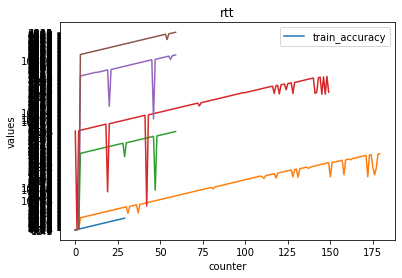

In [12]:
##TROY GRAPHING CELL
for x in range(6):
    if regions[x] == ('asia-east1-b', 'us-central1-a'):
        plt.plot(timestamps[x],rttValues[x])
#plt.plot(timestamps[0],rttValues[0])
# plt.plot(train_history.history['val_accuracy'])
plt.title(f'rtt')
plt.ylabel('values')
plt.legend(['train_accuracy'])
plt.xlabel('counter')
# plt.legend(['no_error', '0.1 error rate'], loc='upper left')
plt.show()


In [124]:
one_hot_machine_type = pd.get_dummies(df['vm_1_machine_type'], dtype='float')
df = df.join(one_hot_machine_type)
one_hot_ip_type = pd.get_dummies(df['ip_type'], dtype='float')
df = df.join(one_hot_ip_type)

In [10]:
# trim vm_1_os_info field
df['vm_1_os_info_trunc'] = df['vm_1_os_info'].str.extract(r'(\w+\s+\d+.\d+).\d+\s+\w+')

KeyError: 'vm_1_os_info'

In [111]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 20)
df.head()
# df[df.run_uri == 'cd2f3786-76a37a69-2dfd-4f89-adf5-5511e9c5576c']

,run_uri,vm_1_cloud,vm_2_cloud,sending_zone,receiving_zone,vm_1_machine_type,vm_2_machine_type,ip_type,vm_1_gce_network_tier,vm_2_gce_network_tier,ping_unit,vm_1_kernel_release,vm_2_kernel_release,rmem_max,tcp_congestion_control,tcp_max_receive_buffer,tcp_max_send_buffer,vm_1_wmem_max,ping_interval_time_us,ping_transaction_count,ping_timestamp,ping_max_latency,ping_min_latency,ping_average_latency,ping_latency_std_dev,sending_machine_type,receiving_machine_type,timestamp,TCP_RR_Latency_p90,TCP_RR_Latency_p99,TCP_RR_Latency_p50,TCP_RR_Latency_stddev,TCP_RR_Latency_mean,TCP_RR_Transaction_Rate,TCP_RR_Latency_Histogram,TCP_RR_Latency_max,TCP_RR_Latency_min,UDP_RR_Latency_max,UDP_RR_Latency_p90,UDP_RR_Latency_min,UDP_RR_Latency_mean,UDP_RR_Latency_p50,UDP_RR_Latency_p99,UDP_RR_Latency_stddev,UDP_RR_Latency_Histogram,TCP_STREAM_Throughput_total_1_thread,TCP_STREAM_Throughput_total_4_threads,TCP_STREAM_Throughput_total_32_threads,TCP_STREAM_Throughput_average_4_threads,TCP_STREAM_Throughput_average_32_threads,TCP_STREAM_Throughput_stddev_4_threads,TCP_STREAM_Throughput_stddev_32_threads,iperf_unit,date_time,iperf_timestamp,vm_1_os_info,vm_2_os_info,vm_1_os_type,vm_2_os_type,iperf_throughput_1_thread,iperf_throughput_4_threads,iperf_throughput_5_threads,iperf_throughput_32_threads,iperf_netpwr_1_thread,iperf_netpwr_4_threads,iperf_netpwr_32_threads,iperf_cwnd_1_thread,iperf_cwnd_4_threads,iperf_cwnd_32_threads,iperf_err_1_thread,iperf_err_4_threads,iperf_err_32_threads,iperf_write_1_thread,iperf_write_4_threads,iperf_write_32_threads,iperf_retry_1_thread,iperf_retry_4_threads,iperf_retry_32_threads,ipert_rtt_1_thread,ipert_rtt_4_threads,ipert_rtt_32_threads,ipert_rtt_unit_1_thread,ipert_rtt_unit_4_threads,ipert_rtt_unit_32_threads,iperf_reported_buffer_size_1_thread,iperf_reported_buffer_size_4_threads,iperf_reported_buffer_size_32_threads,pandas_datetime,n1-standard-16,n1-standard-2,external,internal,vm_1_os_info_trunc
thedate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-29 16:52:38.241408 UTC,b5399e57-e5a13df1-e8fa-43c4-a1be-c242f17231b2,GCP,GCP,us-west1-b,asia-northeast1-a,n1-standard-2,n1-standard-2,internal,premium,premium,ms,4.4.0-146-generic,4.4.0-146-generic,NaN,cubic,6291456.0,NaN,NaN,NaN,NaN,1.556557e+09,94.122,88.240,88.456,0.688,n1-standard-2,n1-standard-2,1.556558e+09,88700.0,88900.0,88400.0,3387.093859,NaN,NaN,"{""176000.0"": 3, ""88200.0"": 406, ""91500.0"": 1, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1057.09,NaN,264.2725,NaN,2.346719,NaN,Mbits/sec,2019-04-29 16:59:43.833609 UTC,1.556557e+09,Ubuntu 14.04.6 LTS,Ubuntu 14.04.6 LTS,NaN,NaN,246.0,NaN,NaN,3817.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-29 16:52:38.241408+00:00,0.0,1.0,0.0,1.0,Ubuntu 14.04
2019-04-29 16:52:39.188728 UTC,b5399e57-176b99d1-027d-4b53-91c5-09ddf791e148,GCP,GCP,us-west1-b,asia-northeast1-a,n1-standard-2,n1-standard-2,internal,standard,standard,ms,4.4.0-146-generic,4.4.0-146-generic,NaN,cubic,6291456.0,NaN,NaN,NaN,NaN,1.556557e+09,88.520,88.274,88.374,0.143,n1-standard-2,n1-standard-2,1.556558e+09,88600.0,88800.0,88500.0,3388.226436,NaN,NaN,"{""88800.0"": 12, ""92000.0"": 1, ""176000.0"": 1, ""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1078.84,NaN,269.7100,NaN,4.860775,NaN,Mbits/sec,2019-04-29 16:59:44.681262 UTC,1.556557e+09,Ubuntu 14.04.6 LTS,Ubuntu 14.04.6 LTS,NaN,NaN,276.0,NaN,NaN,3836.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-29 16:52:39.188728+00:00,0.0,1.0,0.0,1.0,Ubuntu 14.04
2019-04-29 16:54:20.89529 UTC,b5399e57-e5a13df1-e8fa-43c4-a1be-c242f17231b2,GCP,GCP,asia-northeast1-a,us-west1-b,n1-standard-2,n1-standard-2,internal,premium,premium,ms,4.4.0-146-generic,4.4.0-146-generic,NaN,cubic,6291456.0,NaN,NaN,NaN,NaN,1.556557e+09,88.629,88.370,88.435,0.383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [141]:
gb = df.groupby(['sending_zone',
                 'receiving_zone',
                 'tcp_max_receive_buffer',
                 'vm_1_machine_type',
                 'ip_type',
                 'tcp_congestion_control',
                 'vm_1_os_info_trunc'], 
                as_index=False)[[
                                  # 'thedate',
                                  # 'sending_zone',
                                  # 'receiving_zone',
                                  'pandas_datetime',
                                  'iperf_throughput_1_thread',
                                  'iperf_throughput_32_threads',
                                  'tcp_max_receive_buffer',
                                  'ping_average_latency',
#                                   'vm_1_machine_type',
#                                   'ip_type',
                                  'n1-standard-16',
                                  'n1-standard-2',
                                  'external',
                                  'internal',
                                  'tcp_congestion_control',
                                ]]

In [142]:
list(gb.groups)[0:5]

[('asia-east1-b',
  'asia-east2-a',
  500000000.0,
  'n1-standard-16',
  'external',
  'bbr',
  'Ubuntu 18.04'),
 ('asia-east1-b',
  'asia-east2-a',
  500000000.0,
  'n1-standard-16',
  'external',
  'bbr',
  'Ubuntu 20.04'),
 ('asia-east1-b',
  'asia-east2-a',
  500000000.0,
  'n1-standard-16',
  'external',
  'cubic',
  'Ubuntu 16.04'),
 ('asia-east1-b',
  'asia-east2-a',
  500000000.0,
  'n1-standard-16',
  'external',
  'cubic',
  'Ubuntu 18.04'),
 ('asia-east1-b',
  'asia-east2-a',
  500000000.0,
  'n1-standard-16',
  'external',
  'cubic',
  'Ubuntu 20.04')]

In [143]:
group_list = list(gb.groups)
g = group_list[0]

In [144]:
max_len = 0
for i in list(gb.groups):
  l = len(gb.get_group(i).values.tolist())
  if l > max_len:
    max_len = l
    
max_len

852

In [116]:
g = group_list[4]
g

('asia-east1-b',
 'asia-east2-a',
 500000000.0,
 'n1-standard-16',
 'external',
 'cubic',
 'Ubuntu 20.04')

In [117]:
group_values = gb.get_group(g).values.tolist()

In [118]:
group_values[0]

[Timestamp('2021-05-05 11:38:46.188374+0000', tz='UTC'),
 6441.0,
 6740.0,
 500000000.0,
 12.883,
 1.0,
 0.0,
 1.0,
 0.0,
 'cubic']

In [119]:
timestamps = []
iperf_32_values = []
for value in group_values:
  timestamps.append(value[0])
  iperf_32_values.append(value[2])

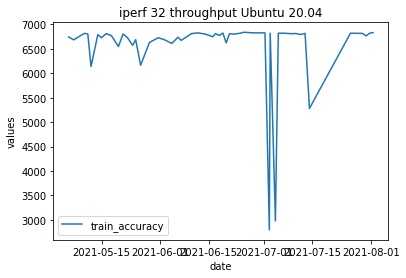

In [120]:


plt.plot(timestamps,iperf_32_values)
# plt.plot(train_history.history['val_accuracy'])
plt.title(f'iperf 32 throughput {g[6]}')
plt.ylabel('values')
plt.legend(['train_accuracy'])
plt.xlabel('date')
# plt.legend(['no_error', '0.1 error rate'], loc='upper left')
plt.show()


In [121]:
len(group_values)

50

In [122]:
max_time_delta_sec = 30 * 60 * 60
difference = group_values[1][0] - group_values[0][0]
difference.total_seconds()

124589.407414

In [123]:
max_time_delta_sec 

108000

In [124]:
def min_percent_index(num, percent, offset):
    min_index = round((num-1)*percent) + offset
    if min_index >= num:
        min_index = num-1
    return min_index

def max_percent_index(num, percent, offset):
    max_index = round((num-1)*percent) + offset
    if max_index >= num:
        max_index = num-1
    return max_index

In [125]:
group_list_position = 0
horizon = 0
window = 5
step = 1
# Max time delta = 30 hours
max_time_delta_sec = 30 * 60 * 60
current_group = group_list[group_list_position]
min_index = 0
max_index = 69
max_index = max_index - horizon
i = min_index + window

sample_list = []
target_list = []

rows = np.arange(i, max_index+1)
  # print("i: ", i)
  # print("max index: ", max_index)
  # print(rows)

for j,row in enumerate(rows):
  low_index = rows[j] - window
  high_index = rows[j]
  sample = group_values[low_index:high_index:step]
  target = group_values[rows[j] + horizon]
  
  # Check dates of sample to make sure there are no gaps
  bad_sample = False
  for sample_index in range(1, len(sample)):
    difference = sample[sample_index][0] - sample[sample_index-1][0]
    delta_in_seconds = difference.total_seconds()
    if delta_in_seconds > max_time_delta_sec:
      bad_sample = True
  
  if bad_sample:
    continue
    

  # print("j: ", rows[j])
  # print(sample)
  # print(target)
  sample_list.append(sample)
  target_list.append(target)

IndexError: list index out of range

In [126]:
len(sample_list)

3

In [127]:
sample_list[0]

[[Timestamp('2021-06-16 05:43:05.502055+0000', tz='UTC'),
  5134.0,
  6746.0,
  500000000.0,
  12.796,
  1.0,
  0.0,
  1.0,
  0.0,
  'cubic'],
 [Timestamp('2021-06-16 23:37:56.496376+0000', tz='UTC'),
  5105.0,
  6810.0,
  500000000.0,
  12.853,
  1.0,
  0.0,
  1.0,
  0.0,
  'cubic'],
 [Timestamp('2021-06-18 03:28:00.344294+0000', tz='UTC'),
  4337.0,
  6772.0,
  500000000.0,
  12.854,
  1.0,
  0.0,
  1.0,
  0.0,
  'cubic'],
 [Timestamp('2021-06-19 03:46:03.769874+0000', tz='UTC'),
  5417.0,
  6821.0,
  500000000.0,
  12.998,
  1.0,
  0.0,
  1.0,
  0.0,
  'cubic'],
 [Timestamp('2021-06-20 02:41:26.877409+0000', tz='UTC'),
  5773.0,
  6620.0,
  500000000.0,
  12.606,
  1.0,
  0.0,
  1.0,
  0.0,
  'cubic']]

In [128]:
import pandas_data_util

In [129]:
filename = 'data/bq-results-20211029-114839-fy49t32j30hp.csv'
train_percent=0.6
valid_percent=0.2
normalize=0
Data = pandas_data_util.DataUtil(filename,
                train_percent,
                valid_percent,
                horizon,
                window,
                normalize)

/home/derek/projects/ml/tf_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,14,18,19,43,44,45,49,50,74,75,76,77,79,90,91) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [140]:
Data.train[0][2]

array([[Timestamp('2021-08-05 20:29:46.575553+0000', tz='UTC'),
        -0.03986454045610948, -0.7725354340405309, 0.42092811657562634,
        -1.1351330071916452, 1.0, 0.0, 1.0, 0.0, 'bbr'],
       [Timestamp('2021-08-06 21:29:39.466611+0000', tz='UTC'),
        0.07552882752878384, -0.7772921500202391, 0.42092811657562634,
        -1.1353747154978142, 1.0, 0.0, 1.0, 0.0, 'bbr'],
       [Timestamp('2021-08-07 22:46:04.533854+0000', tz='UTC'),
        0.08329788596737073, -0.7765353997507402, 0.42092811657562634,
        -1.1355218422928735, 1.0, 0.0, 1.0, 0.0, 'bbr'],
       [Timestamp('2021-08-08 23:43:31.119014+0000', tz='UTC'),
        -0.09013491858814221, -0.7780489002897382, 0.42092811657562634,
        -1.1387376136705991, 1.0, 0.0, 1.0, 0.0, 'bbr'],
       [Timestamp('2021-08-10 00:46:33.860539+0000', tz='UTC'),
        -0.1829066164136208, -0.7784813290151662, 0.42092811657562634,
        -1.1357215143718826, 1.0, 0.0, 1.0, 0.0, 'bbr']], dtype=object)

In [131]:
Data.train[1][0]

array([Timestamp('2021-08-08 23:43:31.119014+0000', tz='UTC'),
       -0.09013491858814221, -0.7780489002897382, 0.42092811657562634,
       -1.1387376136705991, 1.0, 0.0, 1.0, 0.0, 'bbr'], dtype=object)

In [132]:
len(Data.train[0])

68575

In [133]:
len(Data.test[0])

21023

In [134]:
len(Data.valid[0])

18141